### Reference Counting 
- Phương thức này dùng để quản lý bộ nhớ bên trong python, ta có thể hiểu như sau:
    - Mỗi đối tượng trong python đều duy trì số lượng tham chiếu trỏ đến nó. 
    - Nếu số tham chiếu = 0 thì bộ nhớ mà đối tượng được phân bổ sẽ bị hủy và giải phóng

In [5]:
import sys

a = []
print(sys.getrefcount(a))

# Ouput = 2
# 1 from 'a'
# 1 from getrefcount(a)

2


In [6]:
b = a
print(sys.getrefcount(b))

3


In [7]:
del b
print(sys.getrefcount(a))

2


### Gabarge Collection
- Python có 1 hệ thống thu gom 'rác' tuần hoàn để xử lý các chu kỳ tham chiếu. Chu kỳ tham chiếu xuất hiện khi đối tượng này phải tham chiếu đến đối tượng khác, đảm bảo những đối tượng đó không bị số lượng tham chiếu = 0

In [8]:
import gc 
# bật GC = Garbage Collection 
gc.enable()
# Tắt GC 
# gc.disable()
gc.collect()

9177

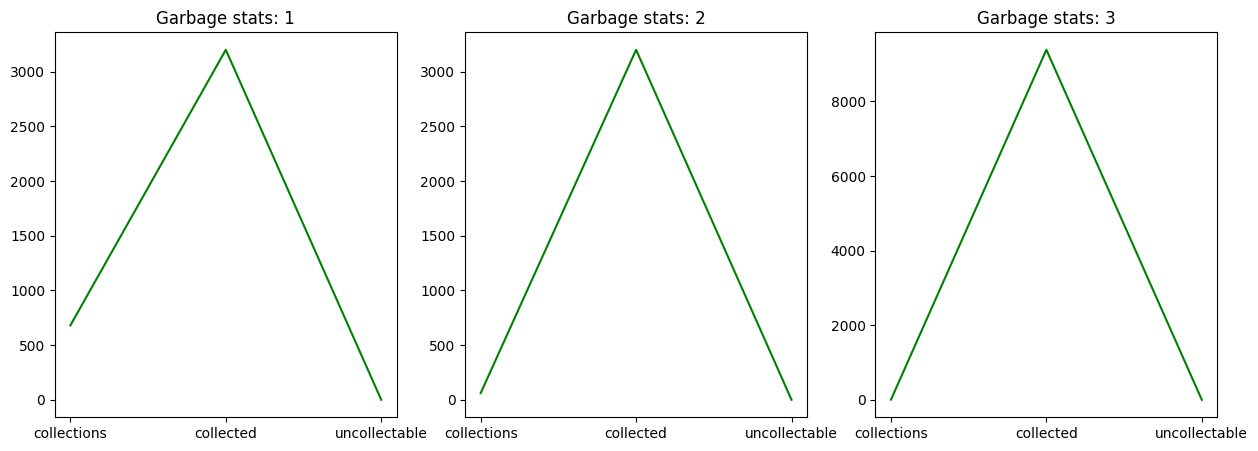

In [9]:
# Get GC stats 
import math
import matplotlib.pyplot as plt

stats = gc.get_stats()
get_key_status = False

x = []
y = {}
# Get key of stats

for index, stat in enumerate(stats): 
    y1 = []
    if not get_key_status:
        for key in stat.keys():
            x.append(key)
        get_key_status = True
    for value in stat.values(): 
        y1.append(value)
    y[f'y{index}'] = y1 
      
rows = math.ceil(len(y) / 3)
plt.figure(figsize=(15,5))
for index, y1 in enumerate(y.values()): 
    plt.subplot(rows, len(y), index + 1)
    plt.plot(x, y1, color='green')
    plt.title(f'Garbage stats: {index+1}')

In [10]:
# Get unreachable object
print(gc.garbage)

[]


### Quản lý bộ nhớ hiệu quả
1. Sử dụng các biến cục bộ, tránh sử dụng biến toàn cục vì biến cục bộ được giải phóng sớm hơn biến toàn cục
2. Tránh tham chiếu vòng tròng 
3. Sử dụng các trình tạo: vì các trình tạo chỉ tạo ra 1 mục trong 1 thời điểm (yeild)
4. Nhớ xóa biến khi không dùng tới 
5. Sử dụng công cụ để phân tích việc sử dụng bộ nhớ như tracemalloc, memory_profiler

In [11]:
class MyObj: 

    def __init__(self, name):
        self.name = name
        print(f'My obj {name} create success')

    def __del__(self): 
        print(f'Object {self.name} deleted')

obj1 = MyObj(name='Hello')
obj2 = MyObj(name='World')

# Tránh sử dụng tham chiếu vòng tròn thế này !
obj1.ref = obj2
obj2.ref = obj1

del obj1
del obj2

gc.collect()

My obj Hello create success
My obj World create success
Object Hello deleted
Object World deleted


8387

In [12]:
# Handle generator 

def generate_number(n):
    for i in range(n): 
        yield i

for num in generate_number(100000): 
    print(num)
    if num > 10:
        break

0
1
2
3
4
5
6
7
8
9
10
11


[13895157, 241637, 57.50426052301593]
[12639251, 92010, 137.36823171394414]
[2484168, 35570, 69.83885296598257]
[2341707, 22483, 104.15456122403594]
[2001442, 9977, 200.60559286358625]
[1801344, 17479, 103.0576119915327]
[1311027, 14249, 92.00835146326058]
[1293833, 10, 129383.3]
[945816, 2669, 354.3709254402398]
[913056, 16298, 56.02257945760216]


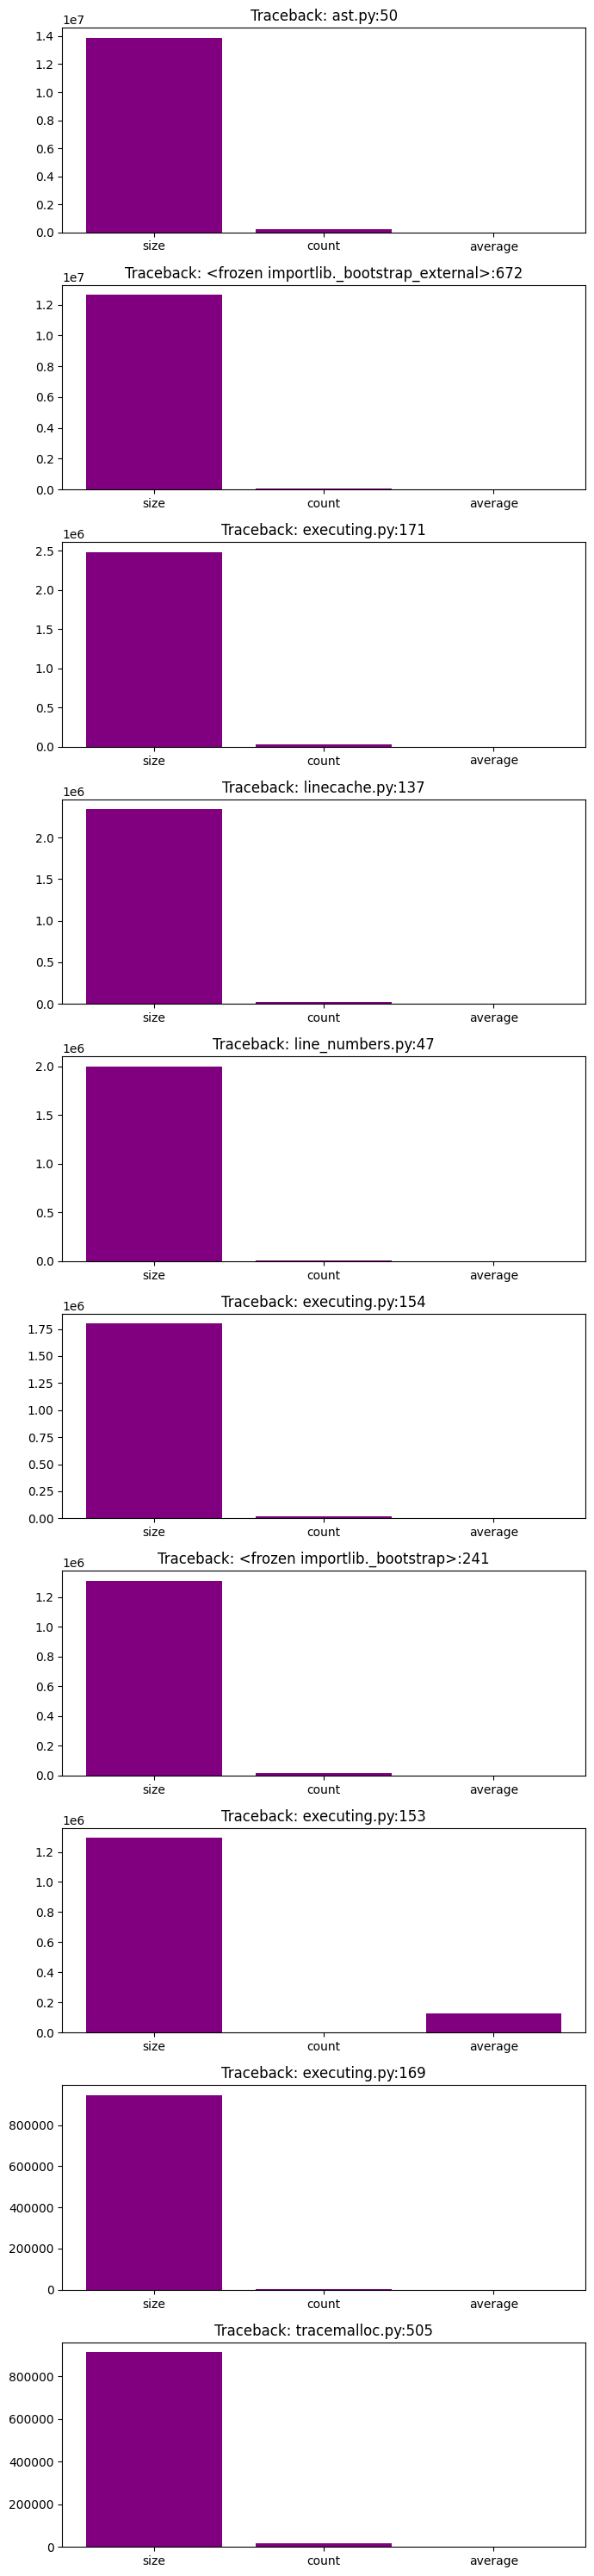

In [22]:
# Profiling memory
import tracemalloc

def create_list(): 
    return [i for i in range(100000)]

def format_size_return_float(size):
    size = float(size) 
    return size

def main(): 
    tracemalloc.start()

    create_list()

    snapshot = tracemalloc.take_snapshot()

    top_stats = snapshot.statistics('lineno')
    x = ['size', 'count', 'average']
    y = []
    traceback_names = []
    for stat in top_stats[:10]: 
        y1 = []
        y1.append(stat.size)
        y1.append(stat.count)
        y1.append(float(stat.size / stat.count))
        y.append(y1)
        traceback_names.append(str(stat.traceback).split('\\')[len(str(stat.traceback).split('\\')) - 1])
       
    rows = len(y)
    cols = 1
    width_per_plot = 7
    height_per_plot = 3
    plt.figure(figsize=(cols * width_per_plot, rows * height_per_plot))

    for index, y1 in enumerate(y): 
        print(y1)
        plt.subplot(rows, cols, index + 1)
        plt.bar(x, y1, color='purple')  # hoặc plt.bar(x, y1)
        plt.title(f'Traceback: {traceback_names[index]}')
    plt.tight_layout()
    plt.show()

main()